<a href="https://colab.research.google.com/github/Armin-Abdollahi/Iris-Flower-Classification/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing dataset from sklearn
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris() #dataset loading
X = iris.data               #Features stored in X 
y = iris.target             #Class variable

In [5]:
#Splitting dataset into Training (80%) and testing data (20%) using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Create an XGB classifier and instance of the same
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBClassifier()

In [7]:
clf.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [8]:
y_pred = clf.predict(X_test)

In [9]:
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [10]:
#importing library and segregation of data as train and test using DMatrix Data structure
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [11]:
#paramaters 
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 5  # the number of training iterations

In [12]:
#model builing using training data
bst = xgb.train(param, dtrain, num_round)

In [13]:
#To calculate predication using test data
y_predict = bst.predict(dtest)
#print(y_predict)

In [14]:
bst.dump_model('dump.raw.txt')

In [15]:
#Prediction using test data
preds = bst.predict(dtest)

In [17]:
#Calculating prediction accuracy
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
from sklearn.metrics import precision_score
print (precision_score(y_test, best_preds, average='macro'))
# >> 1.0

1.0


In [19]:
#Saving the model in pkl file
import sklearn.externals
import joblib
joblib.dump(bst, 'bst_model.pkl', compress=True)
# bst = joblib.load('bst_model.pkl') # load it later

['bst_model.pkl']

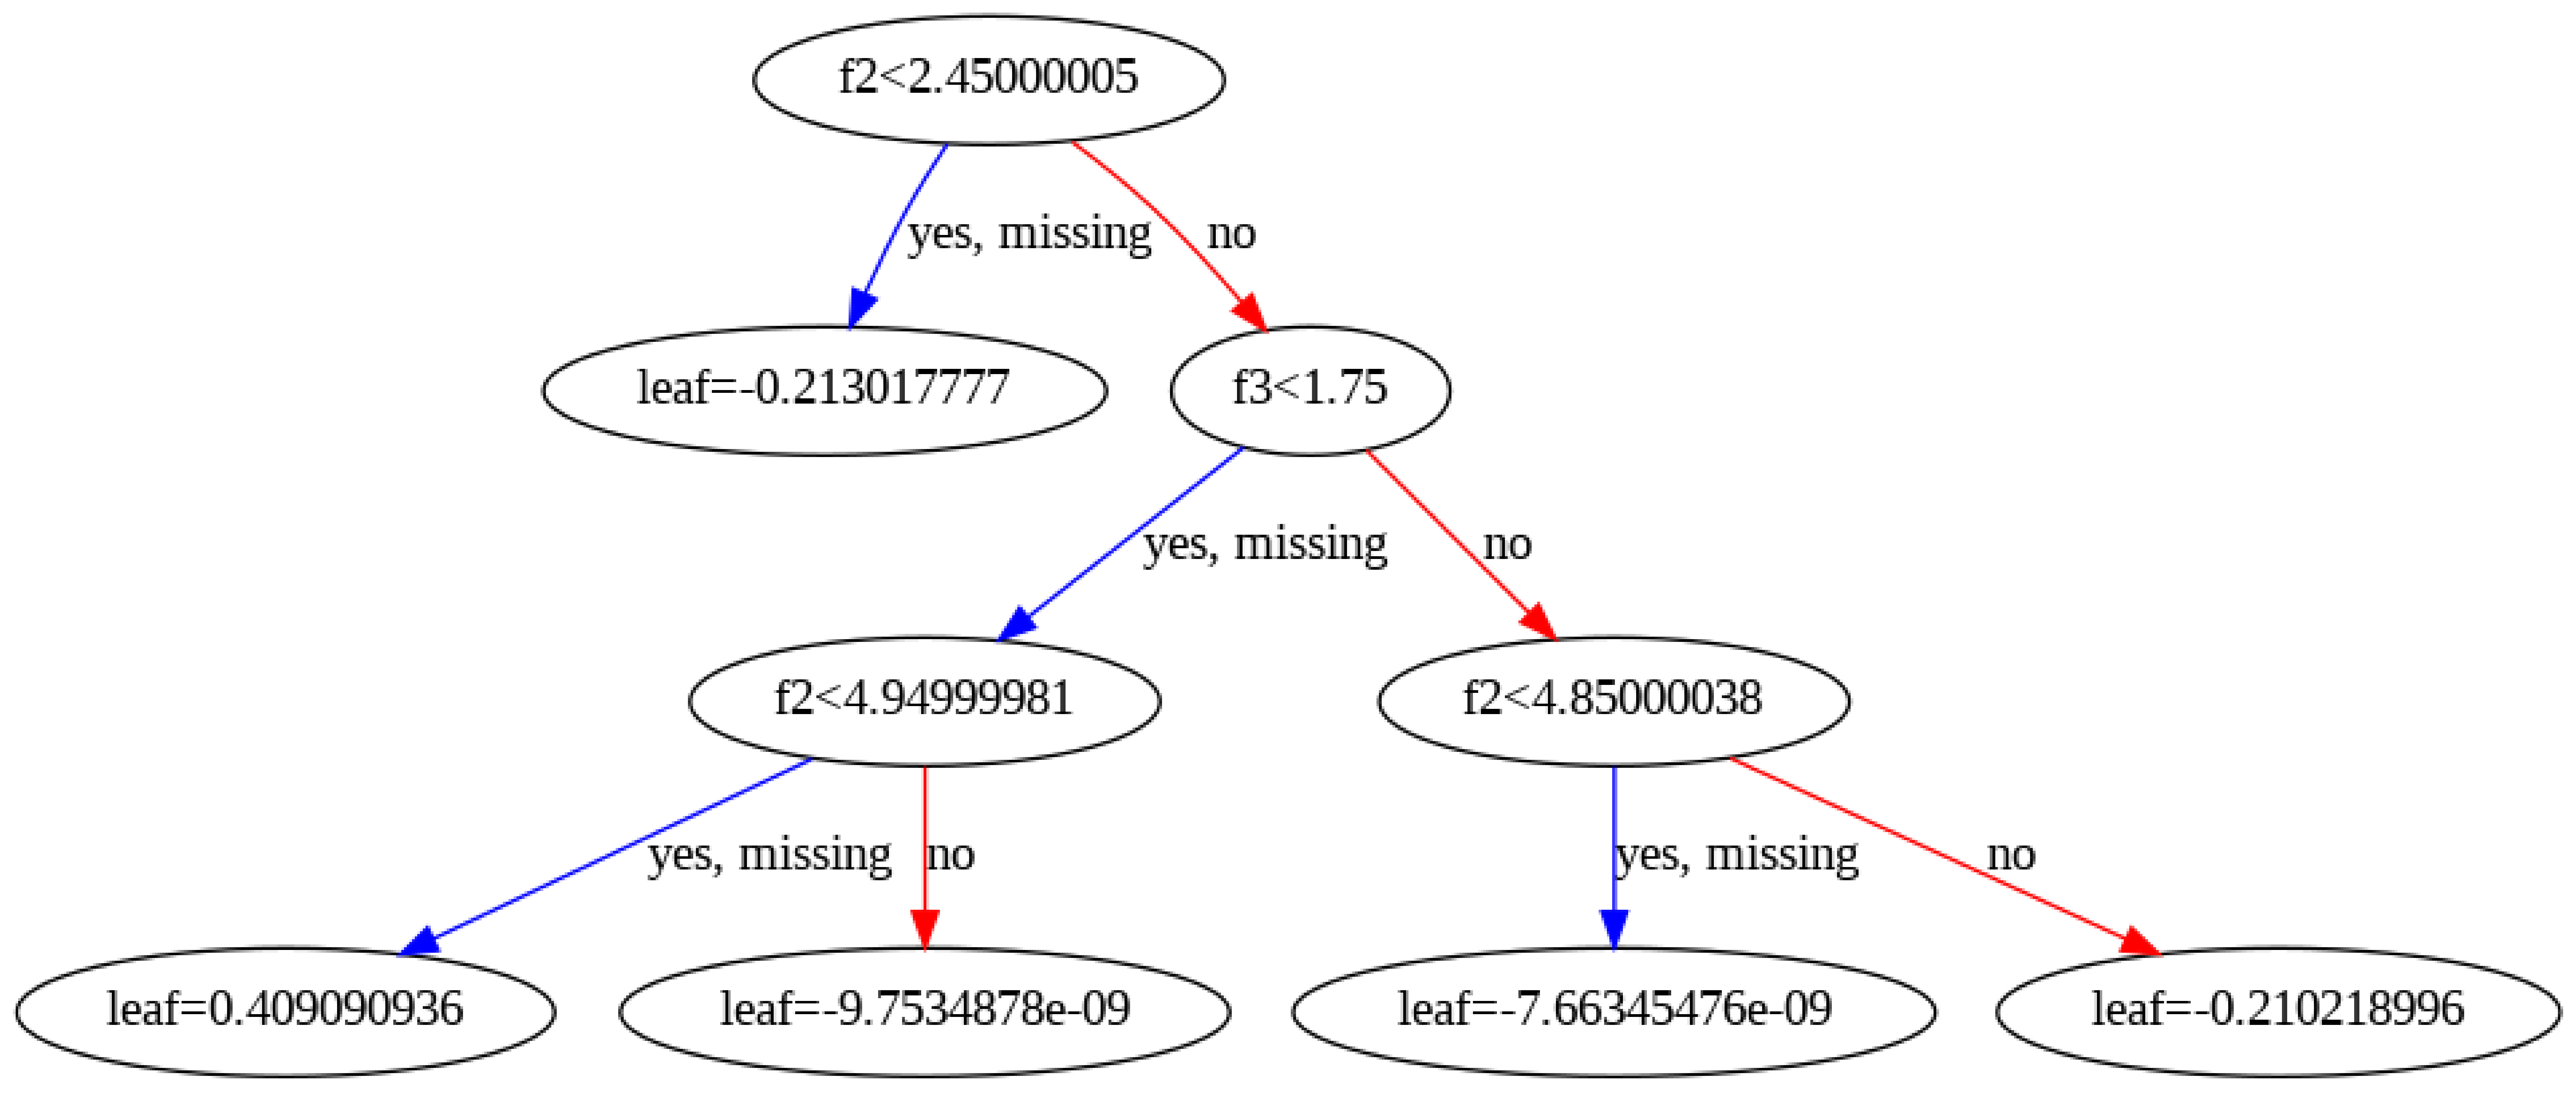

In [20]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_tree(bst, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('treeIris.png')

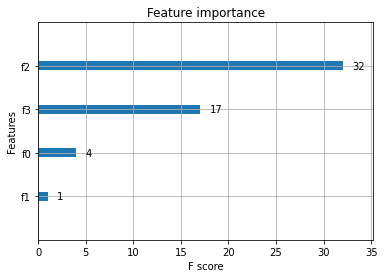

In [21]:
#Feature importance
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(bst)
pyplot.show()

#f1 - sepal length in cm
#f2 - sepal width in cm
#f3 - petal length in cm
#f4 - petal width in cm